In [ ]:
import backtrader as bt
import pandas_datareader.data as web
import datetime

In [ ]:
# Create a strategy
class TestStrategy(bt.Strategy):
    
    params = (
        ('maperiod', 15),
    )
    
    def log(self, txt, dt = None):
        dt = dt or self.datas[0].datetime.date(0)
        print('{}, {}'.format(dt.isoformat(), txt))
      
    def __init__(self):
        
        self.dataclose = self.datas[0].close
        
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], 
            period = self.params.maperiod
        )
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY CREATED, Price: {}, Cost: {}, Comm: {}'.format(
                        order.executed.price, 
                        order.executed.value, 
                        order.executed.comm
                    )
                )
                
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
                
            elif order.issell():
                self.log(
                    'SELL CREATED, Price: {}, Cost: {}, Comm: {}'.format(
                        order.executed.price,
                        order.executed.value,
                        order.executed.comm
                    )
                )
            
            self.bar_executed = len(self)
        
        elif order.status in [order.Cancelled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        
        self.log(
            'OPERATION PROFIT, GROSS {}, NET {}'.format(
                trade.pnl, 
                trade.pnlcomm
            )
        )
               
    def next(self):
        self.log('Close, {}'.format(self.dataclose[0]))
        
        if self.order:
            return 
        
        if not self.position:
        
            if self.dataclose[0] > self.sma[0]:

                    self.log('BUY CREATE, {}'.format(self.dataclose[0]))
                    self.order = self.buy()
        else:
            if self.dataclose[0] < self.sma[0]:
                self.log('SELL CREATE, {}'.format(self.dataclose[0]))
                self.order = self.sell()

        
cerebro = bt.Cerebro()
        
cerebro.addstrategy(TestStrategy)
        
class PandasData(bt.feed.DataBase):
    params = (
        ('datetime', None),
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1),
        ('openinterest', None),
    )

aapl = web.DataReader(
    name = 'AAPL',
    data_source = 'yahoo',
    start = '2017-01-01',
    end = '2017-12-31'  
).rename(
    columns = {
        'Open': 'open',
        'High': 'high',
        'Low': 'low',
        'Close': 'close',
        'Volume': 'volume'
    }
    
)

data = bt.feeds.PandasData(
    dataname = aapl,
    fromdate = datetime.datetime(2017, 1, 1),
    todate = datetime.datetime(2017, 12, 31)
)

cerebro.adddata(data)

cerebro.broker.set_cash(100000.0)
cerebro.addsizer(bt.sizers.FixedSize, stake = 10)
cerebro.broker.setcommission(commission = 0.001)

print('Starting portfolio value: {}'.format(cerebro.broker.get_value()))
cerebro.run()
print('Final portfolio value: {}'.format(cerebro.broker.getvalue()))

Starting portfolio value: 100000.0
2017-01-24, Close, 119.97000122070312
2017-01-24, BUY CREATE, 119.97000122070312
2017-01-25, BUY CREATED, Price: 120.41999816894531, Cost: 1204.1999816894531, Comm: 1.204199981689453
2017-01-25, Close, 121.87999725341797
2017-01-26, Close, 121.94000244140625
2017-01-27, Close, 121.94999694824219
2017-01-30, Close, 121.62999725341797
2017-01-31, Close, 121.3499984741211
2017-02-01, Close, 128.75
2017-02-02, Close, 128.52999877929688
2017-02-03, Close, 129.0800018310547
2017-02-06, Close, 130.2899932861328
2017-02-07, Close, 131.52999877929688
2017-02-08, Close, 132.0399932861328
2017-02-09, Close, 132.4199981689453
2017-02-10, Close, 132.1199951171875
2017-02-13, Close, 133.2899932861328
2017-02-14, Close, 135.02000427246094
2017-02-15, Close, 135.50999450683594
2017-02-16, Close, 135.35000610351562
2017-02-17, Close, 135.72000122070312
2017-02-21, Close, 136.6999969482422
2017-02-22, Close, 137.11000061035156
2017-02-23, Close, 136.52999877929688
2017

2017-09-13, OPERATION PROFIT, GROSS -27.400054931640625, NET -30.624854888916015
2017-09-13, Close, 159.64999389648438
2017-09-14, Close, 158.27999877929688
2017-09-15, Close, 159.8800048828125
2017-09-18, Close, 158.6699981689453
2017-09-19, Close, 158.72999572753906
2017-09-20, Close, 156.07000732421875
2017-09-21, Close, 153.38999938964844
2017-09-22, Close, 151.88999938964844
2017-09-25, Close, 150.5500030517578
2017-09-26, Close, 153.13999938964844
2017-09-27, Close, 154.22999572753906
2017-09-28, Close, 153.27999877929688
2017-09-29, Close, 154.1199951171875
2017-10-02, Close, 153.80999755859375
2017-10-03, Close, 154.47999572753906
2017-10-04, Close, 153.47999572753906
2017-10-05, Close, 155.38999938964844
2017-10-05, BUY CREATE, 155.38999938964844
2017-10-06, BUY CREATED, Price: 154.97000122070312, Cost: 1549.7000122070312, Comm: 1.5497000122070312
2017-10-06, Close, 155.3000030517578
2017-10-09, Close, 155.83999633789062
2017-10-10, Close, 155.89999389648438
2017-10-11, Close,

<IPython.core.display.Javascript object>


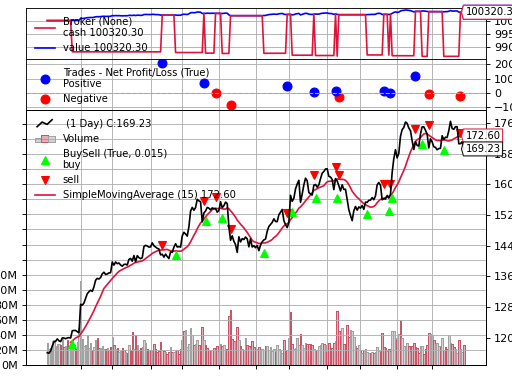

[[<Figure size 640x480 with 4 Axes>]]

In [ ]:
cerebro.plot()